<a href="https://colab.research.google.com/github/Yashwardhankaul/mobile_price_classification/blob/master/mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier Comparison
This code compares the accuracy of five different machine learning clasification algorithms trained on a [kaggle dataset](https://www.kaggle.com/iabhishekofficial/mobile-price-classification#test.csv) containing mobile price data. The code uses [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) to train these models on the procured dataset. 

**PROBLEM** : The problem here is to train the models on the train.csv dataset with price_range as the target label so that then the model can be used to classify the price_range of the data present in the test.csv file. 

**STEPS** : 
1. Download the .zip file containing the data to colab and unzip the file to fascilitate the data to be put into a pandas dataframe for analysis.
2. Take care of outliers, missing values and other descrepencies in the data that might have an adverse affect on the accuracy of the predictions.
3. Conduct Exploratory data analysis on the dataframe so that relationships can be understood between different labels and their relationships to the target label.
4. Train the models (Linear Regression, K-Nearest Neighbour, Logistic Regression, Decision tree, Random Forest) on the dataset so find out the accuracy score and find out the most accurate model for the problem.
5.  Use sklearn's classification_report function to display precision, recall, F1 score for the winning model.
6. Finally, use the winning model to predict the missing price_range in the test.csv file.

### PART 1
This part will enable us to download and extract the dataset.zip file using the kaggle API and then store the dataset in a pandas dataframe on colab itself.

In [0]:
# Upload the kaggle.json file containing the API key downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Nov 12 14:44 kaggle.json


In [0]:
# Install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Copy the dataset locally.
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 37.9MB/s]


In [6]:
# Unzip the file 
!unzip mobile-price-classification.zip

Archive:  mobile-price-classification.zip
  inflating: train.csv               
  inflating: test.csv                


In [0]:
#import dependencies
import pandas as pd
import numpy as np

train_data = pd.read_csv("train.csv")

###PART 2
In this part of the notebook I will explore the dataset to look for outliers, missing values or other descrepencies that might have a degrading affect on the accuracy of the models.

In [8]:
# Let's take a look at some of the data. 
train_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores     ...       px_height  px_width   ram  sc_h  sc_w  \
0        188        2     ...              20       756  2549     9     7   
1        136        3     ...             905      1988  2631    17     3   
2        145        5     ...            1263      1716  2603    11     2   
3        131        6     ...            1216      1786  2769    16     8   
4        141        2     ...            1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [9]:
# It might be handy to look at all the columns and their value dtypes.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [10]:
# statistical data of all the columns. 
train_data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

          ...         px_height     px_width          ram         sc_h  \
count     ...       2000.000000  2000.000000  2000.000000  2000.000000   
mean      ...        645.108000  1251.515500  2124.213000    12.306500   
std       ...        443.780811   432.199447  1084.732044     4.213245   
min       ...          0.000000   500.000000   256.000000     5.000000   
25%       ...        282.750000   874.750000  1207.500000     9.000000   
50%       ...        564.000000  1247.000000  2146.500000    12.000000   
75%       ...        947.250000  1633.000000  3064.500000    16.000000   
max       ...       1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000  

[8 rows x 21 columns]

Creating a function to calulate and display a table of missing values in the dataframe.

In [0]:
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
   
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [12]:
missing_values_table(train_data)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Looks like the dataset does not have any missing values.

### PART 3
Exploratory Data Analysis. This part is really necessay to extrapolate relationships between different labels and their relationship to the target label. Only after Data analysis will the dataset be deemed fit for training.

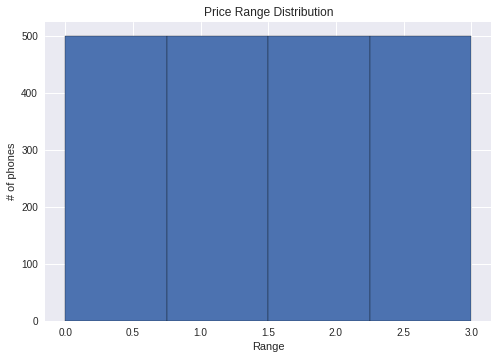

In [13]:
import matplotlib.pyplot as plt
# Histogram of the Energy Star Score
plt.hist(train_data['price_range'], bins = 4, edgecolor = 'k');
plt.title('Price Range Distribution');
plt.xlabel('Range');plt.ylabel('# of phones')
plt.show()

The Dataset has 500 patapoints for each Price range that is  0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

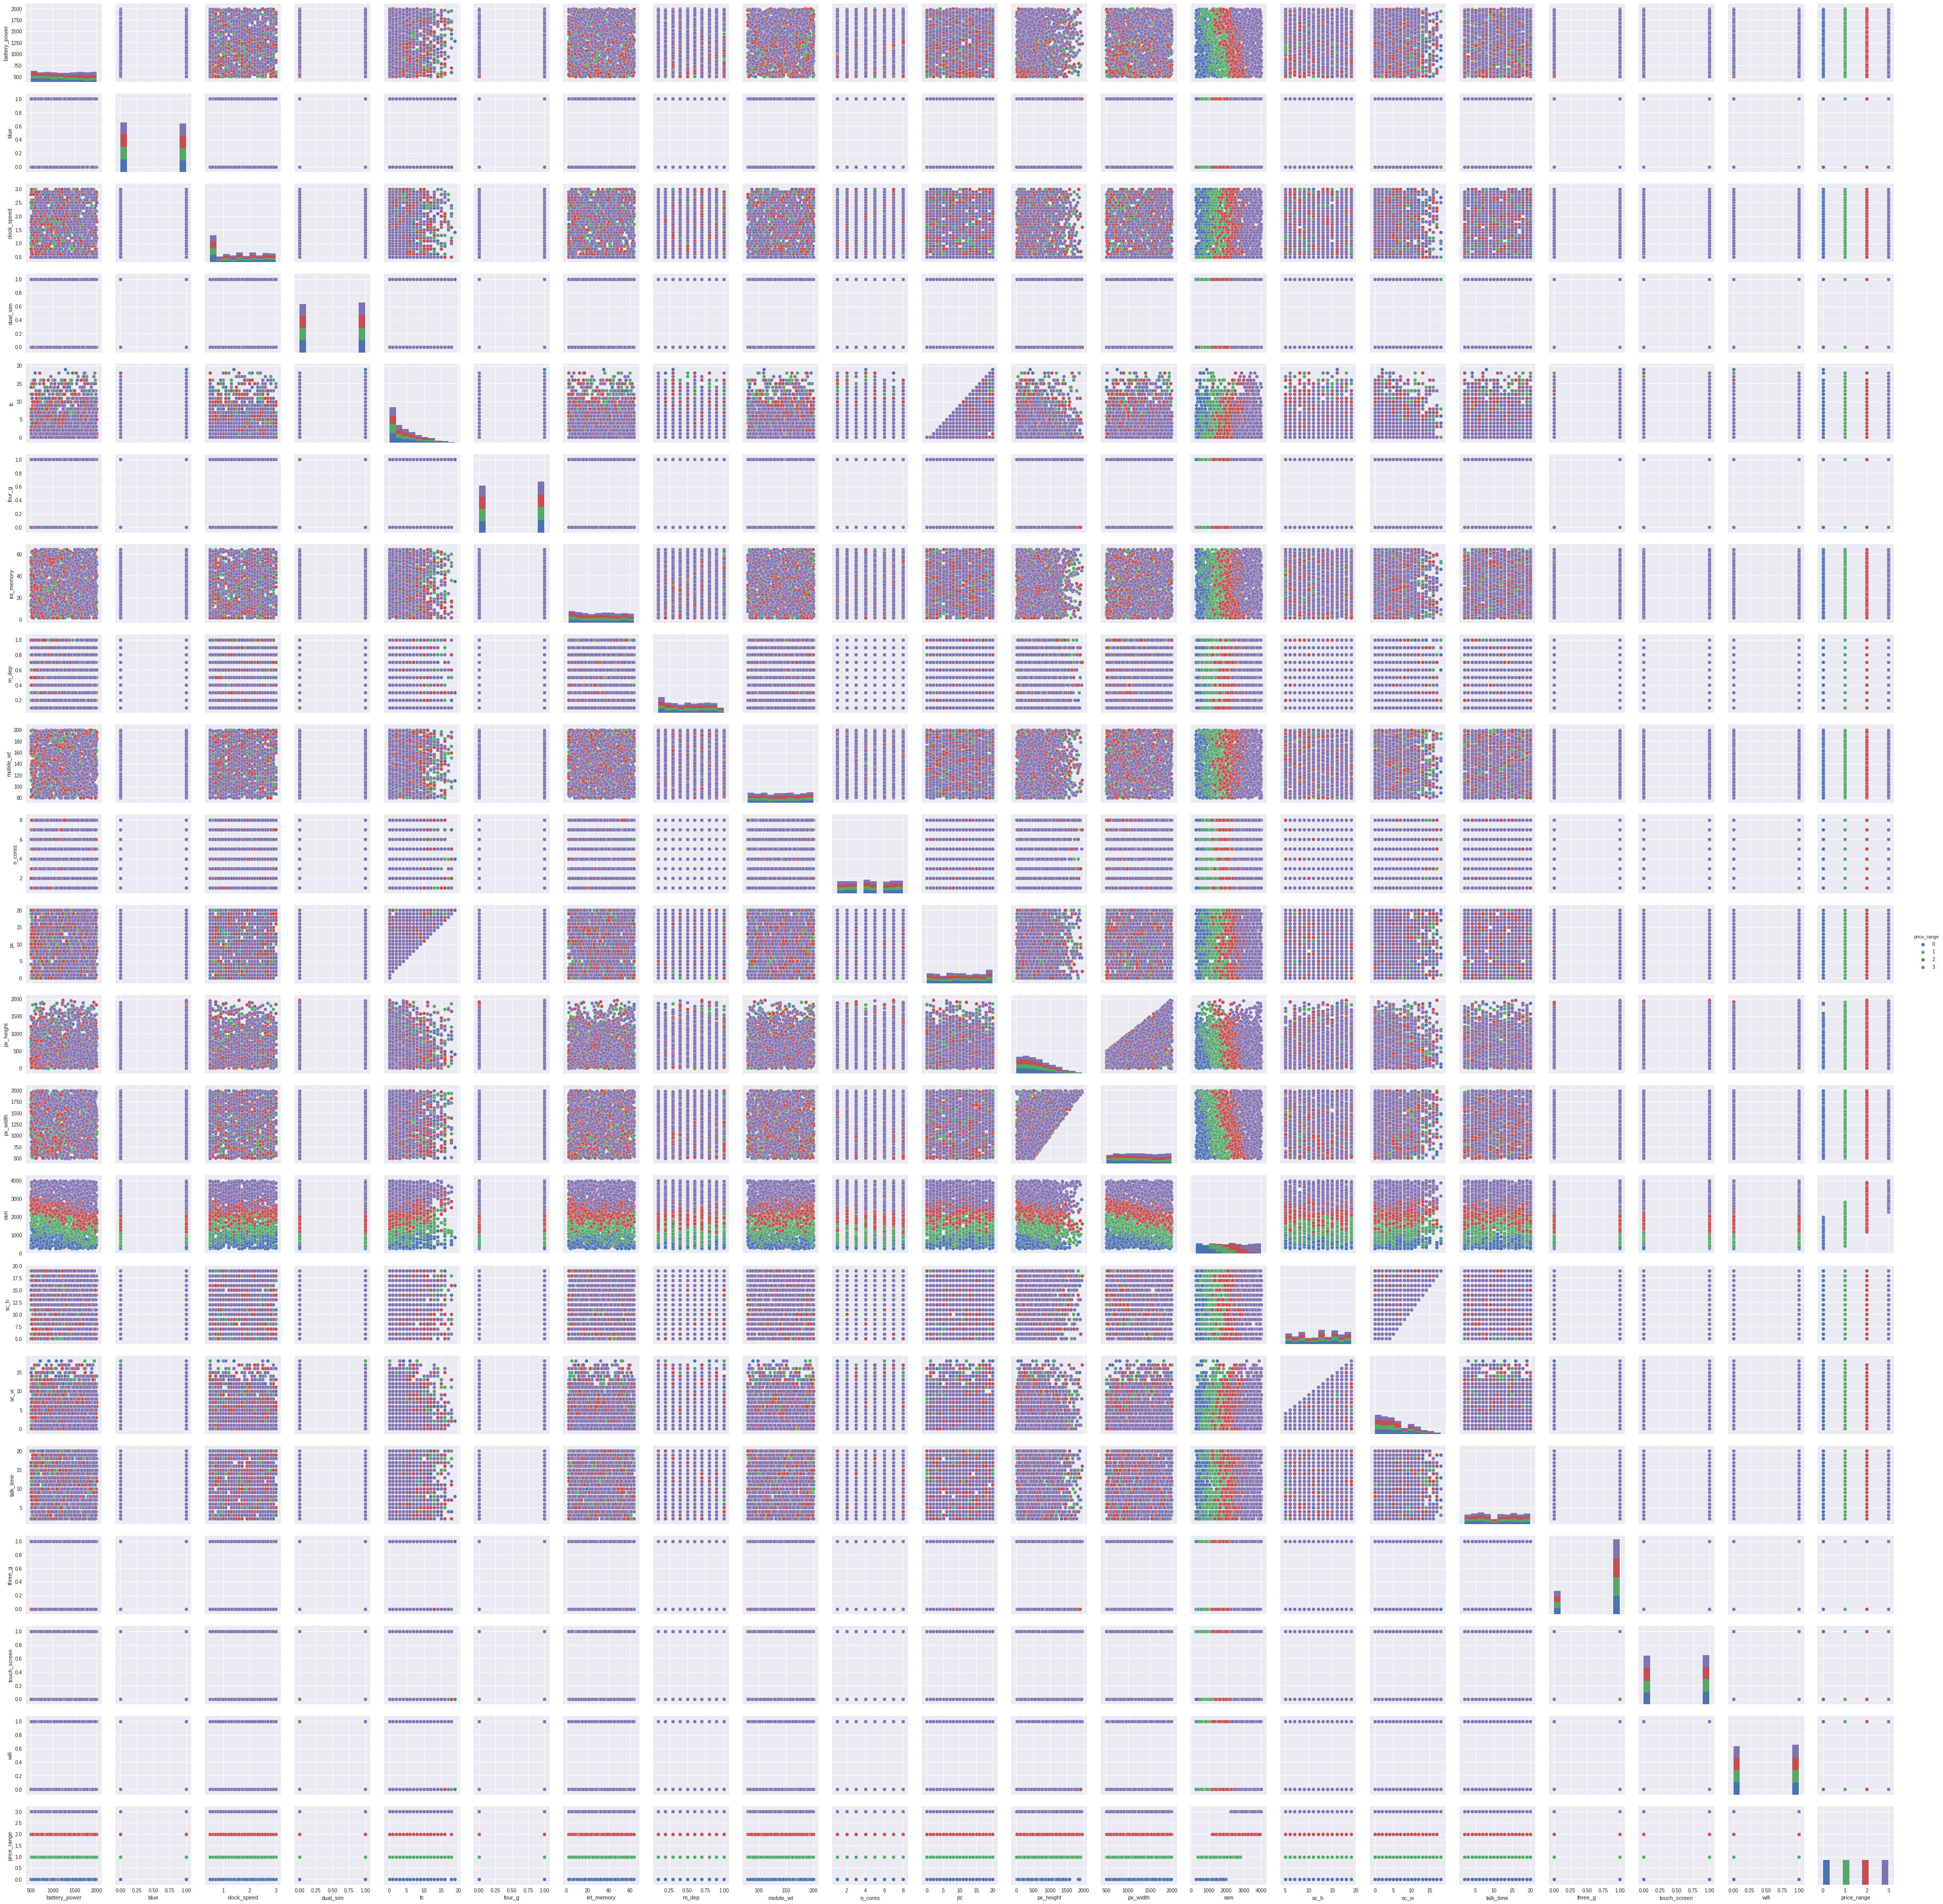

In [14]:
!pip install seaborn
import seaborn as sns
sns.pairplot(train_data,hue='price_range')

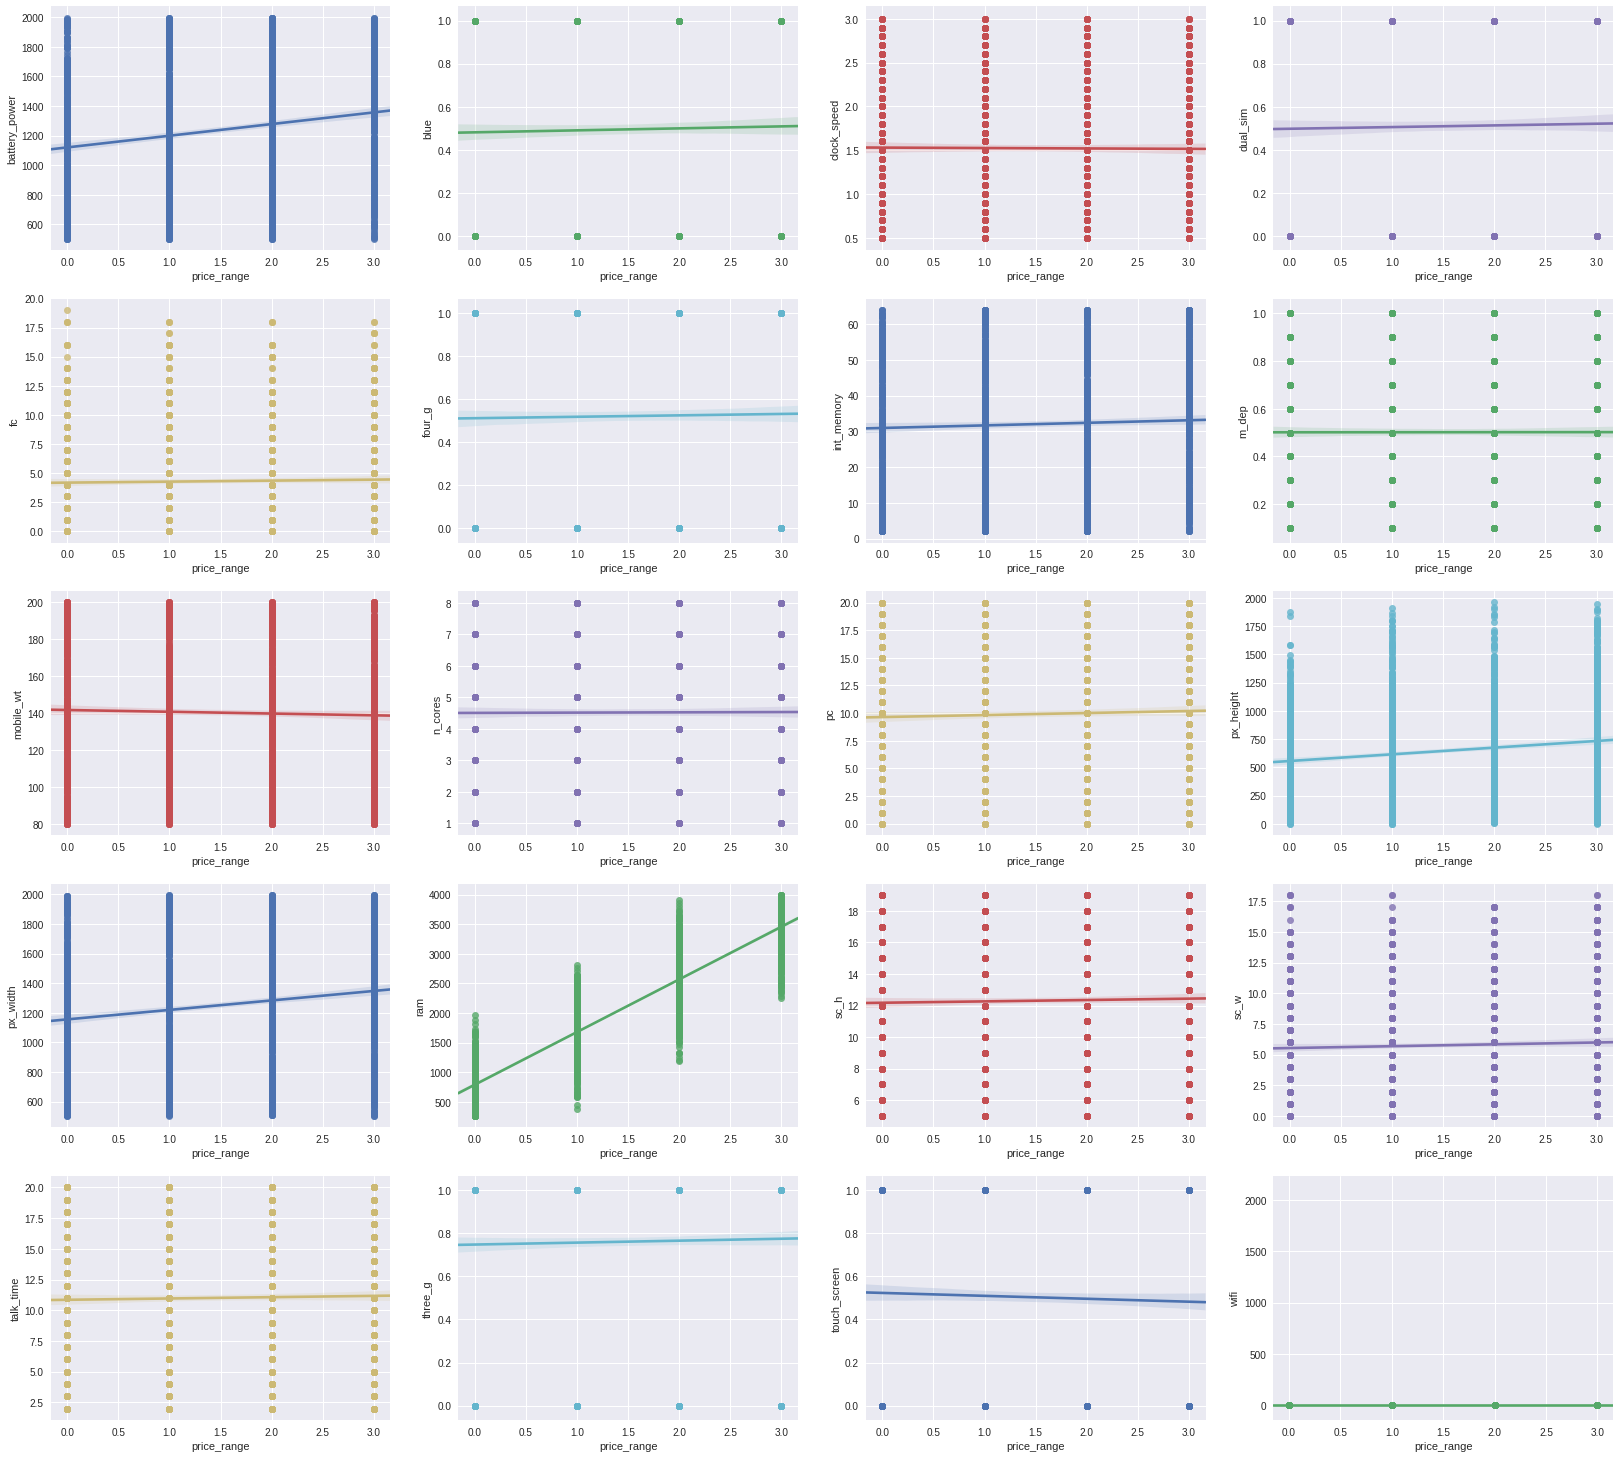

In [15]:
import seaborn as sns
f, axes = plt.subplots(5, 4,figsize=(28, 26))

sns.regplot(x="price_range", y="battery_power", data=train_data, ax=axes[0,0]);
sns.regplot(x="price_range", y="blue", data=train_data, ax=axes[0,1]);
sns.regplot(x="price_range", y="clock_speed", data=train_data, ax=axes[0,2]);
sns.regplot(x="price_range", y="dual_sim", data=train_data, ax=axes[0,3]);
sns.regplot(x="price_range", y="fc", data=train_data, ax=axes[1,0]);
sns.regplot(x="price_range", y="four_g", data=train_data, ax=axes[1,1]);
sns.regplot(x="price_range", y="int_memory", data=train_data, ax=axes[1,2]);
sns.regplot(x="price_range", y="m_dep", data=train_data, ax=axes[1,3]);
sns.regplot(x="price_range", y="mobile_wt", data=train_data, ax=axes[2,0]);
sns.regplot(x="price_range", y="n_cores", data=train_data, ax=axes[2,1]);
sns.regplot(x="price_range", y="pc", data=train_data, ax=axes[2,2]);
sns.regplot(x="price_range", y="px_height", data=train_data, ax=axes[2,3]);
sns.regplot(x="price_range", y="px_width", data=train_data, ax=axes[3,0]);
sns.regplot(x="price_range", y="ram", data=train_data, ax=axes[3,1]);
sns.regplot(x="price_range", y="sc_h", data=train_data, ax=axes[3,2]);
sns.regplot(x="price_range", y="sc_w", data=train_data, ax=axes[3,3]);
sns.regplot(x="price_range", y="talk_time", data=train_data, ax=axes[4,0]);
sns.regplot(x="price_range", y="three_g", data=train_data, ax=axes[4,1]);
sns.regplot(x="price_range", y="touch_screen", data=train_data, ax=axes[4,2]);
sns.regplot(x="price_range", y="wifi", data=train_data, ax=axes[4,3]);

From these relationship graphs we can extrapolate the following relationships with Price Range:
1. Battery Power - Positive correlation
2. Bluetooth - Positive correlation (slight)
3. Clock Speed - Almost no correlation (slight positive)
4. Dual SIM - positive correlation (slight)
5. Front Camera mega pixels - positive correlation (slight)
6. 4G - positive correlation (slight)
7. Internal Memory in Gigabytes - positive correlation (slight)
8. Mobile Depth in cm - no correlation
9. Weight of mobile phone - negative correlation
10. Number of cores of processor - no correlation
11. Primary Camera mega pixels - positive correlation (slight)
12. Pixel Resolution Height - posotive correlation 
13. Pixel Resolution Width - positive correlation
14. Random Access Memory in Megabytes - positive correlation
15. Screen Height of mobile in cm - positive correlation
16. Screen Width of mobile in cm - positive correlation (slight)
17. Talk Time - positive correlation
18. 3G- slight positive correlation
19. Touch Screen - no correlation
20. wifi - no correlation

**NOTE** - 
The price of the mobile phone seems mostly related to the MB of RAM present in the device.

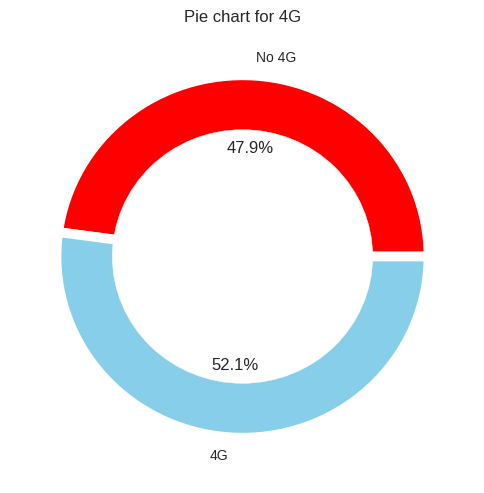

In [16]:
from matplotlib.pyplot import figure
# create pie chart for devices with and without 4G
a = np.array(train_data.four_g.value_counts())
figure(num=0, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
names= 'No 4G','4G'
size = [a[1],a[0]]
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
# Give color names
plt.pie(size, labels=names, colors=['red','skyblue'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
p=plt.gcf()
plt.title('Pie chart for 4G')
p.gca().add_artist(my_circle)
plt.show()

Let's visualize the # of devices with Face Camera and Primary Camera versus the Mega Pixels. 

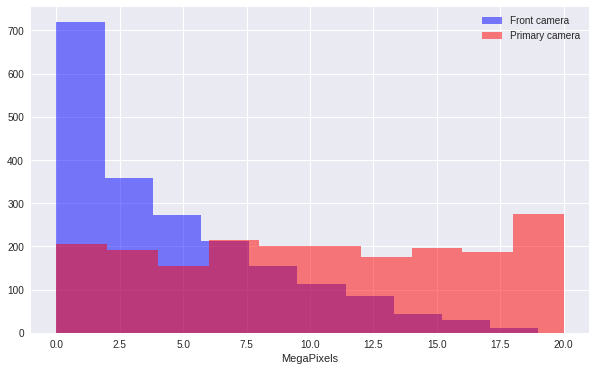

In [17]:
plt.figure(figsize=(10,6))
train_data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train_data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels');

###PART 4
In this part we will use the dataset to train different classification models and test the results to find out the best machine learning technique that will give us the most accurate results.  

In [0]:
# import dependencies
from sklearn.model_selection import train_test_split

# X will have the entire dataframe except the target label
# This is the data which will be used to train the model
X=train_data.drop('price_range',axis=1)
# y is the target label i.e. what we are trying to predict.
y=train_data['price_range']

# using the sklearn train_test_split function to split the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [0]:
# Array to store the accuracy scores
scores = []

### 1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_score = lm.score(X_test,y_test)
scores.append(lm_score)
lm_score

0.9182475066069199

### 2. K-Nearest Neighbours 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
scores.append(knn_score)
knn_score

0.9318181818181818

### 3. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_score = lg.score(X_test,y_test)
scores.append(lg_score)
lg_score

0.7666666666666667

### 4. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_score = dtree.score(X_test,y_test)
scores.append(dtree_score)
dtree_score

0.8196969696969697

### 5. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test,y_test)
scores.append(rfc_score)
rfc_score

0.8909090909090909

Now let's compare the Scores

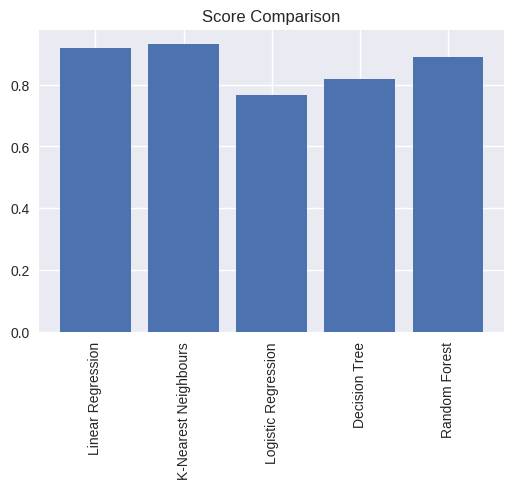

In [35]:
figure(num=0, figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')
height = scores
bars = ["Linear Regression","K-Nearest Neighbours","Logistic Regression","Decision Tree","Random Forest"]
y_pos = np.arange(len(bars))

# Add title and axis names
plt.title("Score Comparison")
plt.bar(y_pos, height)

# Create names on the y-axis
plt.xticks(y_pos, bars,rotation='vertical')
 
# Show graphic
plt.show()

We can conclude that most accurate predictions can be achieved by using Linear Regression and K-Nearest Neighbours with KNN being the slightly better of the two.

###PART 5 
In this section we will use the sklearn's classification_report function to display a text summary of the precision, recall, F1 score for each class.

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       172
          1       0.93      0.95      0.94       165
          2       0.90      0.90      0.90       161
          3       0.94      0.91      0.92       162

avg / total       0.93      0.93      0.93       660



###PART 6
Finally, in this part we will use KNN for prediction of test.csv price range values.

In [0]:
# Read the csv file into a pandas dataframe.
test_data=pd.read_csv('test.csv')

In [38]:
# Let's take a look
test_data.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...   pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...   16        226      1412  3476    12     7   
1    0.8        191  ...   12        746       857  3895     6     0   
2    0.9        186  ...    4       1270      1366  2396    17    10   
3    0.5         96  ...   20        295      1752  3893    10     0   
4    0.5        108  ...   18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [0]:
# Need to drop the unnessary column 'ID'
test_data=test_data.drop('id',axis=1)

In [0]:
price_prediction = knn.predict(test_data)

In [42]:
price_prediction

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [0]:
# Add the price_range column to the dataframe with the predicted values.
test_data['price_range']=price_prediction

In [44]:
test_data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
5             1464     1          2.9         1   5       1          50   
6             1718     0          2.4         0   1       0          47   
7              833     0          2.4         1   0       0          62   
8             1111     1          2.9         1   9       1          25   
9             1520     0          0.5         0   1       0          25   
10            1500     0          2.2         0   2       0          55   
11            1343     0          2.9         0   2       1          34   
12             900     1          1.4         1   0       0          30   
13            1190     1          2.2         1   5       0          19   
14             630     0          1.8         0   8       1          51   
15            1846     1          1.0         0   5       1          53   
16            1985     0          0.5         1  14       1          26   
17            1042     0          2.9         0   5       1          48   
18            1231     1          1.7         1   2       1          37   
19            1488     0          2.6         0   9       0          37   
20             968     0          0.6         0   8       1           7   
21             529     0          2.6         1   1       0          60   
22            1558     0          1.7         1   7       0          50   
23             533     1          0.7         1  16       0          58   
24            1037     0          1.7         1   1       0           5   
25            1025     0          1.6         1   6       1          43   
26            1858     0          3.0         1   0       0          17   
27             980     0          0.5         0   1       0           8   
28             644     1          0.5         1   9       0          15   
29            1024     1          1.6         1   0       1          38   
..             ...   ...          ...       ...  ..     ...         ...   
970           1247     1          2.1         0  10       1          63   
971           1207     0          1.1         1   9       1          56   
972           1198     1          0.5         1   0       0          31   
973           1796     1          0.5         0   0       0          44   
974           1855     0          1.0         1   8       0          58   
975           1557     1          1.6         0   7       0          26   
976            958     0          0.5         1   0       1          47   
977           1882     1          2.1         1   0       0          17   
978           1489     0          0.5         1   7       0          60   
979           1980     0          0.5         1   7       0          15   
980           1235     0          1.8         1   3       0          21   
981            829     0          2.6         1  11       1          10   
982           1998     1          0.5         0   6       0          47   
983           1814     0          1.6         0   6       1           3   
984           1711     1          0.5         1   1       1          12   
985            971     1          2.1         0   9       0           7   
986            991     0          2.6         0   0       0          19   
987            905     0          1.9         1  11       1          12   
988           1653     1          1.3         0   0       0          49   
989            635     1          1.9         1   0       1          57   
990           1807     0          1.2         0   4       0          37   
991           1797     1      